# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on ='Mouse ID',how='left')

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice in the Mouse_metadata
#number_of_mouse = mouse_metadata['Mouse ID'].count()

#Checking the number of mice in the merged DF using unique() it creates a numpy-array
number_of_mouse = combined_data['Mouse ID'].unique()
#to get the count of our Mouse ID in the combined DF we have to convert the Numpy array into a Pandas series
convert_to_series=pd.Series(number_of_mouse)
convert_to_series.count()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_values = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_values['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=combined_data.loc[combined_data['Mouse ID']=='g989',:]
duplicate_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first',inplace=False)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

updated_number_of_mice = clean_df['Mouse ID'].unique()
convert_to_s=pd.Series(updated_number_of_mice).count()
convert_to_s


249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_regimen.mean()
tumor_median = drug_regimen.median()
tumor_variance = drug_regimen.var()
tumor_standard_deviation = drug_regimen.std()
tumore_sem=drug_regimen.sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics=pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                 "Median Tumor Volume":tumor_median,
                                 "Tumor Volume Variance":tumor_variance,
                                 "Tumor Volume Std. Dev.": tumor_standard_deviation,
                                 "Tumor Volume Std. Err.": tumore_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat = clean_df.groupby('Drug Regimen').agg(
    mean = ('Tumor Volume (mm3)', 'mean'),
    median = ('Tumor Volume (mm3)', 'median'),
    variance = ('Tumor Volume (mm3)', 'var'),
    std_dev = ('Tumor Volume (mm3)', 'std'),
    sem = ('Tumor Volume (mm3)', 'sem')
)
#to have the Tumor Volume (mm3) as the top header for columns, we have to create multiIndex
multi_index = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stat.columns])

summary_stat.columns = multi_index

summary_stat

Tumor Volume (mm3)                                          
                           mean     median   variance   std_dev       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

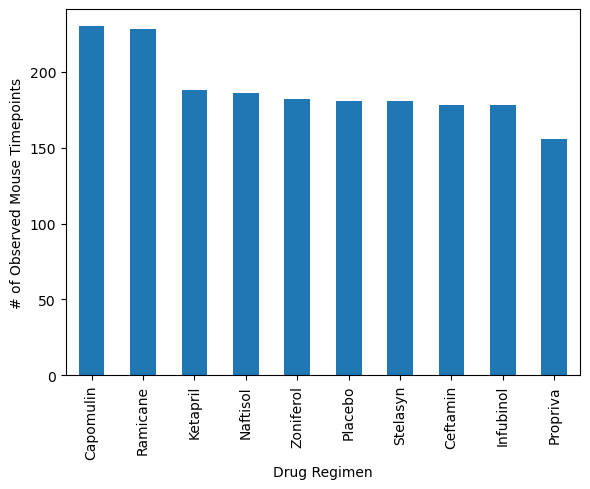

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Create a group based on the values in the 'Drug Regimen' Column
group_drug_regimen=clean_df.groupby('Drug Regimen')

#Count total number of rows (Mouse ID/Timepoints) for each 'Drug Regimen'
drug_regimen_count=group_drug_regimen['Drug Regimen'].count().sort_values(ascending=False)
y_limit=np.arange(0,250,50)
drug_regimen_count.plot(kind='bar', figsize=(6,5), xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints',
                         yticks=y_limit)

plt.tight_layout()
plt.show()

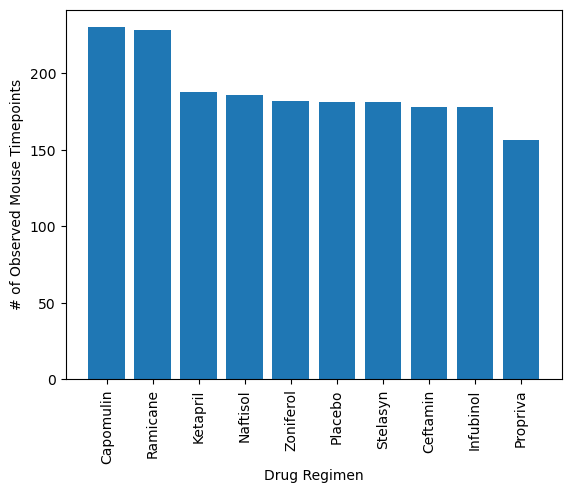

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count2=clean_df.groupby('Drug Regimen').size().sort_values(ascending=False)
plt.bar(drug_regimen_count2.index,drug_regimen_count2.values)
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.yticks([0,50,100,150,200])
plt.show()


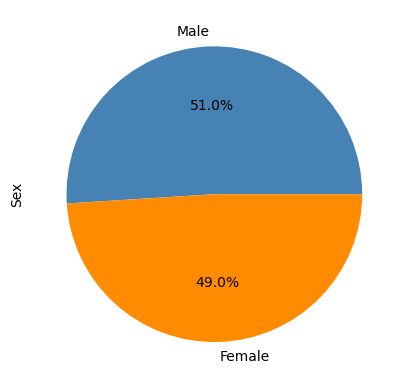

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution=clean_df['Sex'].value_counts()
sex_distribution= round((sex_distribution/sex_distribution.sum()) *100,0)

sex_distribution.plot(kind='pie',autopct='%1.1f%%',colors=['steelblue','darkorange'],
                                                                   ylabel='Sex')


plt.show()

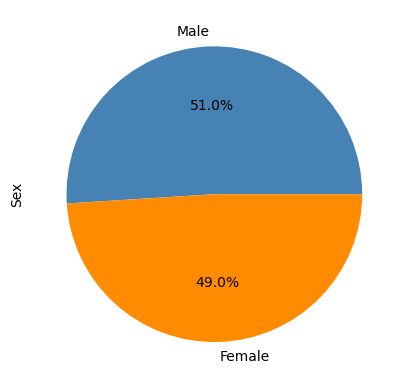

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
color=['steelblue','darkorange']
plt.pie(sex_distribution,colors=color, autopct="%1.1f%%",labels=['Male','Female'])
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']
filtered_df=clean_df[clean_df['Drug Regimen'].isin(treatment_regimen)]

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint=filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df=pd.merge(latest_timepoint,clean_df,on=['Mouse ID','Timepoint'],how='left')

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_regimen:
    final_tumor_volume = tumor_vol_df[tumor_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_list.append((drug,final_tumor_volume))

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
#Loop through each drug and determine outliers
for drug,volumes in tumor_vol_list:
    quartiles=pd.Series(volumes).quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq - lowerq
    
    #Calculate bounds
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # add subset 

    # Determine outliers using upper and lower bounds and to retireve only the Tumor Volume(mm3) values for the outliers we added ['Tumor Volume(mm3)'] at the end
    #tumor_vol_df=pd.merge(latest_timepoint,clean_df,on=['Mouse ID','Timepoint'],how='left')
    outliers = tumor_vol_df[(tumor_vol_df['Drug Regimen'] == drug) & ((tumor_vol_df['Tumor Volume (mm3)'] <lower_bound) | (tumor_vol_df['Tumor Volume (mm3)'] > upper_bound))]['Tumor Volume (mm3)']

    if outliers.empty:
        print(f"{drug}\'s potential outliers: {outliers}")
    else:
        print(f"{drug}\'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


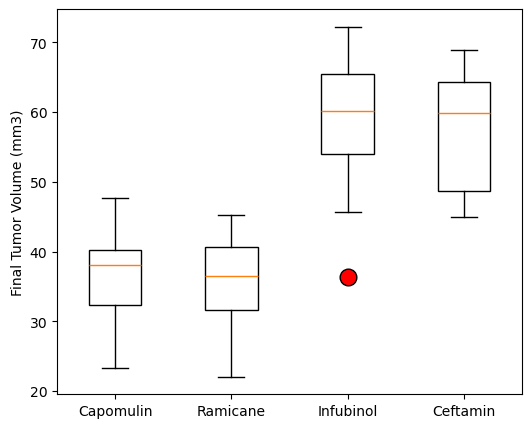

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#extract data from tumor_vol_list (it has two values drug labels and tumor volume)
tumor_volume=[]
drug_labels=[]

for drug, volumes in tumor_vol_list:
    tumor_volume.append(volumes)
    drug_labels.append(drug)

#create a box plot
plt.figure(figsize=(6,5))
boxplot = plt.boxplot(tumor_volume,labels=drug_labels,patch_artist=True, vert=True,showfliers=True)

#Make the boxplots transparent
for box in boxplot['boxes']:
    box.set(facecolor='None')
#customize colors and style for outliers
for outlier in boxplot['fliers']:
    outlier.set(marker='o', markerfacecolor='red', markersize=12)

plt.ylabel("Final Tumor Volume (mm3)")

plt.tight_layout

plt.show()




## Line and Scatter Plots

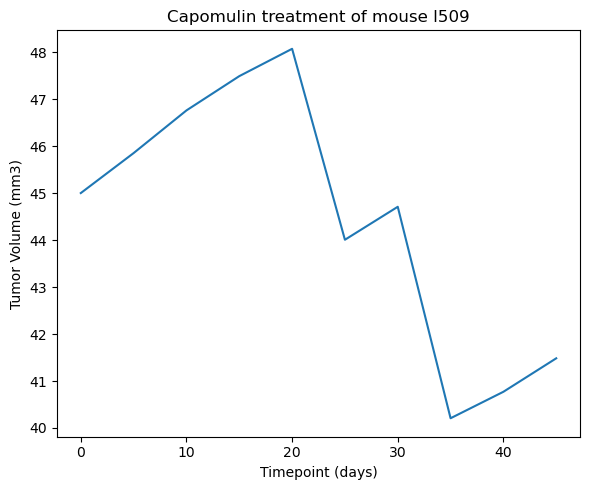

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = clean_df[(clean_df['Drug Regimen']=='Capomulin') & (clean_df['Mouse ID']=='l509')]
plt.figure(figsize=(6,5))

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()



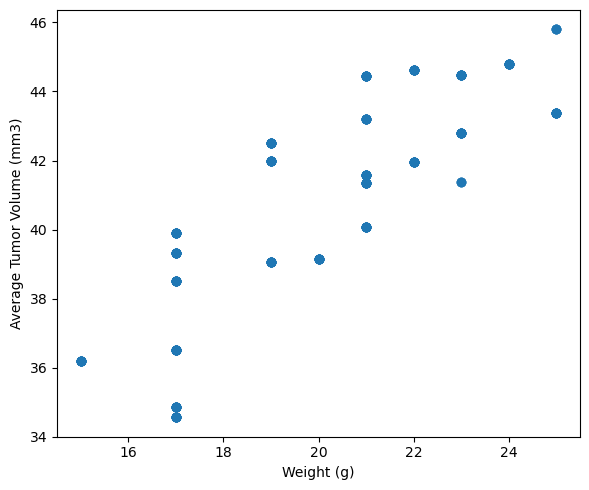

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filter data for Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen']=='Capomulin']

#Calculate the average tumor volume for each mouse in the filtered dataframe
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#getting the weight of each mouse
mouse_weight = capomulin_data[['Mouse ID','Weight (g)']].set_index('Mouse ID')

#Merge the average tumor volume and mouse weight data
merged_data=pd.merge(avg_tumor_volume,mouse_weight, on='Mouse ID')

plt.figure(figsize=(6,5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.tight_layout()
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


C:\Users\User\AppData\Local\Temp\ipykernel_32840\3429030451.py:6: DeprecationWarning: Please import `linregress` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  slope,m_int, r, p, std_err = st.stats.linregress(weight,avg_tumor_vol)


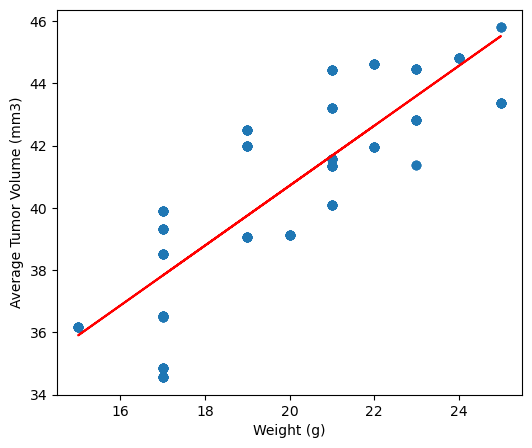

In [19]:
# Calculate the correlation coefficient and a linear regression model 
weight=merged_data['Weight (g)']
avg_tumor_vol = merged_data['Tumor Volume (mm3)']
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,avg_tumor_vol)[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope,m_int, r, p, std_err = st.stats.linregress(weight,avg_tumor_vol)
m_fit=slope*weight + m_int

plt.figure(figsize=(6,5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
plt.plot(weight, m_fit,'r-')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Summary Analysis of Data

From the aggregated summary statistics of tumor volume for each drug regimen, we can assess the central tendency and variability of the tumor volume for each drug: 
    Capomulin and Ramicane show lower mean and median tumor volume and few outliers which indicates the effectiveness in reducing tumor size.
    However, Infubinol and Ceftamin has higher mean and median tumor volumes and having more outliers comapred to Capomlin and Ramicane which indicate less effectiveness. 
